# Comparing plasticity rules

## For every model, meta-learn on 8-dimensional halfspace dataset, then transfer rules to a NEW instance, and train / test that on the same dataset type but with fixed rules.

Created by Basile Van Hoorick, Fall 2020.

In [1]:
%run FF_common.ipynb

## First, test original RNN as a sanity check.

In [2]:
# IMPORTANT: Henceforth, we use GD directly on inputs but use plasticity rules in the output and hidden layers.
opts_up = Options(gd_input=True,
                  use_graph_rule=True,
                  gd_graph_rule=True,
                  use_output_rule=True,
                  gd_output_rule=True,
                  gd_output=False)
opts_down = Options(gd_input=True,
                    use_graph_rule=True,
                    gd_graph_rule=False,  # Not meta-trainable anymore!
                    use_output_rule=True,
                    gd_output_rule=False,  # Not meta-trainable anymore!
                    gd_output=False)
scheme = UpdateScheme(cross_entropy_loss=True,
                      mse_loss=False,
                      update_misclassified_only=False,
                      update_all_edges=True)

# Feed-forward brain config.
n_up = 8  # Input layer size for meta-learning.
n_down = 8  # Input layer size for desired task training.
m = 2  # Output layer size.
l = 2  # Number of hidden layers.
w = 32  # Width of hidden layers.
p = 0.5  # Connectivity probability.
cap = 16  # Number of nodes firing per layer.
dataset = 'halfspace'

# Training config.
num_runs = 10
num_rule_epochs = 50
num_epochs_upstream = 1
num_epochs_downstream = 1

In [3]:
# Instantiate brain factories.
brain_rnn_up_fact = lambda: LocalNet(n_up, m, 64, p, 32, 3, options=opts_up, update_scheme=scheme)
brain_rnn_down_fact = lambda: LocalNet(n_down, m, 64, p, 32, 3, options=opts_down, update_scheme=scheme)

In [4]:
# Evaluate model.
print('==== Original RNN (very different from all the rest) ====')
stats_rnn_up, stats_rnn_down = evaluate_up_down(
    brain_rnn_up_fact, brain_rnn_down_fact, n_up, n_down, dataset=dataset,
    num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)

  0%|                                  | 0/50 [00:00<?, ?it/s]

==== Original RNN (very different from all the rest) ====

Run 1 / 10...
Meta-learning...


100%|█████████████████████████| 50/50 [01:36<00:00,  1.93s/it]
..\LocalNetBase.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.rnn_rule = torch.tensor(rule).flatten().double()
  3%|▋                     | 47/1500 [00:00<00:03, 464.92it/s]

Last loss: 0.3744
Last train accuracy: 0.9087
Last test accuracy: 0.9100
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.5167
INITIAL test accuracy: 0.5400
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.6393
Last train accuracy: 0.6700
Last test accuracy: 0.6280


Run 2 / 10...
Meta-learning...


  3%|▋                     | 43/1500 [00:00<00:03, 429.61it/s]

Last loss: 0.3552
Last train accuracy: 0.9573
Last test accuracy: 0.9540
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.5407
INITIAL test accuracy: 0.5240
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.7093
Last train accuracy: 0.6120
Last test accuracy: 0.5400


Run 3 / 10...
Meta-learning...


  2%|▌                     | 37/1500 [00:00<00:03, 369.53it/s]

Last loss: 0.3642
Last train accuracy: 0.9480
Last test accuracy: 0.9380
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.6333
INITIAL test accuracy: 0.6760
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.5193
Last train accuracy: 0.7913
Last test accuracy: 0.8000


Run 4 / 10...
Meta-learning...


  3%|▋                     | 50/1500 [00:00<00:02, 499.55it/s]

Last loss: 0.3563
Last train accuracy: 0.9620
Last test accuracy: 0.9500
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.4900
INITIAL test accuracy: 0.4740
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.6713
Last train accuracy: 0.6167
Last test accuracy: 0.6000


Run 5 / 10...
Meta-learning...


  4%|▊                     | 53/1500 [00:00<00:02, 529.52it/s]

Last loss: 0.3555
Last train accuracy: 0.9380
Last test accuracy: 0.9340
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.5687
INITIAL test accuracy: 0.5200
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.5173
Last train accuracy: 0.7947
Last test accuracy: 0.7740


Run 6 / 10...
Meta-learning...


  3%|▋                     | 45/1500 [00:00<00:03, 440.77it/s]

Last loss: 0.3545
Last train accuracy: 0.9740
Last test accuracy: 0.9500
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.5847
INITIAL test accuracy: 0.5540
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.6393
Last train accuracy: 0.6780
Last test accuracy: 0.6160


Run 7 / 10...
Meta-learning...


  3%|▋                     | 46/1500 [00:00<00:03, 455.03it/s]

Last loss: 0.3579
Last train accuracy: 0.9440
Last test accuracy: 0.9500
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.5807
INITIAL test accuracy: 0.6200
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.6273
Last train accuracy: 0.6587
Last test accuracy: 0.6940


Run 8 / 10...
Meta-learning...


  2%|▌                     | 37/1500 [00:00<00:03, 366.00it/s]

Last loss: 0.3479
Last train accuracy: 0.9680
Last test accuracy: 0.9520
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.5233
INITIAL test accuracy: 0.5100
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.7353
Last train accuracy: 0.5947
Last test accuracy: 0.6560


Run 9 / 10...
Meta-learning...


  3%|▋                     | 46/1500 [00:00<00:03, 459.58it/s]

Last loss: 0.3605
Last train accuracy: 0.9487
Last test accuracy: 0.9640
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.5593
INITIAL test accuracy: 0.5460
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.6573
Last train accuracy: 0.6307
Last test accuracy: 0.6320


Run 10 / 10...
Meta-learning...


  3%|▋                     | 48/1500 [00:00<00:03, 479.56it/s]

Last loss: 0.3569
Last train accuracy: 0.9580
Last test accuracy: 0.9420
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.4753
INITIAL test accuracy: 0.4620
Epoch 1 / 1 ...


100%|████████████████████| 1500/1500 [00:03<00:00, 487.44it/s]


Last loss: 0.6393
Last train accuracy: 0.6773
Last test accuracy: 0.6400



Saving figure to: figs/comparing_transfer_rnn_halfspace


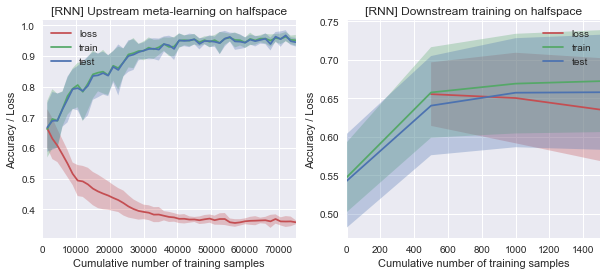

Mean essential stats across all runs:
Last upstream loss: 0.3583
Last upstream train accuracy: 0.9507
Last upstream test accuracy: 0.9444
Last downstream loss: 0.6355
Last downstream train accuracy: 0.6724
Last downstream test accuracy: 0.6580



In [5]:
# Plot aggregated stats.
agg_stats_rnn_up = convert_multi_stats_uncertainty(stats_rnn_up)
agg_stats_rnn_down = convert_multi_stats_uncertainty(stats_rnn_down)
plot_curves(agg_stats_rnn_up, agg_stats_rnn_down,
            '[RNN] Upstream meta-learning on ' + dataset,
            '[RNN] Downstream training on ' + dataset,
            'figs/comparing_transfer_rnn_' + dataset)

## Evaluate all table-based feed-forward networks.

In [6]:
# Instantiate brain factories.
brain_prepost_up_fact = lambda: FFLocalNet(
    n_up, m, l, w, p, cap, hl_rules=TableRule_PrePost(),
    output_rule=TableRule_PrePost(), options=opts_up, update_scheme=scheme)
brain_prepost_down_fact = lambda: FFLocalNet(
    n_down, m, l, w, p, cap, hl_rules=TableRule_PrePost(),
    output_rule=TableRule_PrePost(), options=opts_down, update_scheme=scheme)
brain_prepostcount_up_fact = lambda: FFLocalNet(
    n_up, m, l, w, p, cap, hl_rules=TableRule_PrePostCount(),
    output_rule=TableRule_PrePostCount(), options=opts_up, update_scheme=scheme)
brain_prepostcount_down_fact = lambda: FFLocalNet(
    n_down, m, l, w, p, cap, hl_rules=TableRule_PrePostCount(),
    output_rule=TableRule_PrePostCount(), options=opts_down, update_scheme=scheme)
brain_prepostpercent_up_fact = lambda: FFLocalNet(
    n_up, m, l, w, p, cap, hl_rules=TableRule_PrePostPercent(),
    output_rule=TableRule_PrePostPercent(), options=opts_up, update_scheme=scheme)
brain_prepostpercent_down_fact = lambda: FFLocalNet(
    n_down, m, l, w, p, cap, hl_rules=TableRule_PrePostPercent(),
    output_rule=TableRule_PrePostPercent(), options=opts_down, update_scheme=scheme)
brain_postcount_up_fact = lambda: FFLocalNet(
    n_up, m, l, w, p, cap, hl_rules=TableRule_PostCount(),
    output_rule=TableRule_PostCount(), options=opts_up, update_scheme=scheme)
brain_postcount_down_fact = lambda: FFLocalNet(
    n_down, m, l, w, p, cap, hl_rules=TableRule_PostCount(),
    output_rule=TableRule_PostCount(), options=opts_down, update_scheme=scheme)

In [7]:
# Evaluate models.
print('==== Interpretation: Pre and Post ====')
stats_prepost_up, stats_prepost_down = evaluate_up_down(
    brain_prepost_up_fact, brain_prepost_down_fact, n_up, n_down, dataset=dataset,
    num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)
print('==== Interpretation: Pre and Post and Incoming Count ====')
stats_prepostcount_up, stats_prepostcount_down = evaluate_up_down(
    brain_prepostcount_up_fact, brain_prepostcount_down_fact, n_up, n_down, dataset=dataset,
    num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)
print('==== Interpretation: Pre and Post and Binned Incoming Fraction ====')
stats_prepostpercent_up, stats_prepostpercent_down = evaluate_up_down(
    brain_prepostpercent_up_fact, brain_prepostpercent_down_fact, n_up, n_down, dataset=dataset,
    num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)
print('==== Interpretation: Post and Incoming Count ====')
stats_postcount_up, stats_postcount_down = evaluate_up_down(
    brain_postcount_up_fact, brain_postcount_down_fact, n_up, n_down, dataset=dataset,
    num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)

  0%|                                  | 0/50 [00:00<?, ?it/s]

==== Interpretation: Pre and Post ====

Run 1 / 10...
Meta-learning...


  4%|▊                     | 56/1500 [00:00<00:02, 559.49it/s]

Last loss: 0.3523
Last train accuracy: 0.9707
Last test accuracy: 0.9500
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.5087
INITIAL test accuracy: 0.5100
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.5713
Last train accuracy: 0.7807
Last test accuracy: 0.7840


Run 2 / 10...
Meta-learning...


  5%|█                     | 69/1500 [00:00<00:02, 682.55it/s]

Last loss: 0.3565
Last train accuracy: 0.9660
Last test accuracy: 0.9620
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.4940
INITIAL test accuracy: 0.4820
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.4798
Last train accuracy: 0.8253
Last test accuracy: 0.7820


Run 3 / 10...
Meta-learning...


  5%|█▏                    | 77/1500 [00:00<00:01, 769.29it/s]

Last loss: 0.3577
Last train accuracy: 0.9667
Last test accuracy: 0.9620
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.5040
INITIAL test accuracy: 0.5040
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.5063
Last train accuracy: 0.8040
Last test accuracy: 0.8080


Run 4 / 10...
Meta-learning...


  5%|█                     | 75/1500 [00:00<00:01, 741.90it/s]

Last loss: 0.3442
Last train accuracy: 0.9833
Last test accuracy: 0.9680
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.4833
INITIAL test accuracy: 0.4880
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.4560
Last train accuracy: 0.8220
Last test accuracy: 0.8560


Run 5 / 10...
Meta-learning...


  5%|█                     | 76/1500 [00:00<00:01, 759.31it/s]

Last loss: 0.3504
Last train accuracy: 0.9713
Last test accuracy: 0.9580
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.5073
INITIAL test accuracy: 0.4560
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.5033
Last train accuracy: 0.7847
Last test accuracy: 0.7800


Run 6 / 10...
Meta-learning...


  4%|▉                     | 66/1500 [00:00<00:02, 659.40it/s]

Last loss: 0.6931
Last train accuracy: 0.4813
Last test accuracy: 0.5160
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.4773
INITIAL test accuracy: 0.5040
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.6931
Last train accuracy: 0.4773
Last test accuracy: 0.5040


Run 7 / 10...
Meta-learning...


  5%|█                     | 71/1500 [00:00<00:02, 709.35it/s]

Last loss: 0.3537
Last train accuracy: 0.9533
Last test accuracy: 0.9500
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.5147
INITIAL test accuracy: 0.5520
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.5248
Last train accuracy: 0.8093
Last test accuracy: 0.7340


Run 8 / 10...
Meta-learning...


  5%|█                     | 73/1500 [00:00<00:01, 729.34it/s]

Last loss: 0.3573
Last train accuracy: 0.9613
Last test accuracy: 0.9660
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.5040
INITIAL test accuracy: 0.5300
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.5768
Last train accuracy: 0.7613
Last test accuracy: 0.7260


Run 9 / 10...
Meta-learning...


  5%|█                     | 74/1500 [00:00<00:01, 739.33it/s]

Last loss: 0.3531
Last train accuracy: 0.9600
Last test accuracy: 0.9660
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.4893
INITIAL test accuracy: 0.4840
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.4633
Last train accuracy: 0.8587
Last test accuracy: 0.8140


Run 10 / 10...
Meta-learning...


  5%|▉                     | 68/1500 [00:00<00:02, 672.66it/s]

Last loss: 0.3540
Last train accuracy: 0.9653
Last test accuracy: 0.9280
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.4880
INITIAL test accuracy: 0.5060
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.5038
Last train accuracy: 0.8227
Last test accuracy: 0.8120

==== Interpretation: Pre and Post and Incoming Count ====

Run 1 / 10...
Meta-learning...


  5%|█                     | 71/1500 [00:00<00:02, 705.79it/s]

Last loss: 0.3588
Last train accuracy: 0.9780
Last test accuracy: 0.9660
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.5153
INITIAL test accuracy: 0.4880
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.4773
Last train accuracy: 0.8427
Last test accuracy: 0.8220


Run 2 / 10...
Meta-learning...


  5%|█                     | 70/1500 [00:00<00:02, 699.36it/s]

Last loss: 0.3670
Last train accuracy: 0.9720
Last test accuracy: 0.9660
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.5187
INITIAL test accuracy: 0.5040
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.4354
Last train accuracy: 0.8720
Last test accuracy: 0.8820


Run 3 / 10...
Meta-learning...


  5%|█                     | 75/1500 [00:00<00:01, 749.32it/s]

Last loss: 0.3704
Last train accuracy: 0.9613
Last test accuracy: 0.9400
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.5173
INITIAL test accuracy: 0.5120
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.4510
Last train accuracy: 0.8507
Last test accuracy: 0.8260


Run 4 / 10...
Meta-learning...


  4%|▉                     | 63/1500 [00:00<00:02, 623.19it/s]

Last loss: 0.3605
Last train accuracy: 0.9433
Last test accuracy: 0.9380
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.4760
INITIAL test accuracy: 0.5280
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.4779
Last train accuracy: 0.8453
Last test accuracy: 0.8380


Run 5 / 10...
Meta-learning...


  4%|▉                     | 67/1500 [00:00<00:02, 669.30it/s]

Last loss: 0.3679
Last train accuracy: 0.9727
Last test accuracy: 0.9620
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.5213
INITIAL test accuracy: 0.5100
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.4992
Last train accuracy: 0.8307
Last test accuracy: 0.8060


Run 6 / 10...
Meta-learning...


  5%|█                     | 76/1500 [00:00<00:01, 759.36it/s]

Last loss: 0.6931
Last train accuracy: 0.5033
Last test accuracy: 0.5120
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.5193
INITIAL test accuracy: 0.5460
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.6931
Last train accuracy: 0.5193
Last test accuracy: 0.4940


Run 7 / 10...
Meta-learning...


  5%|█                     | 70/1500 [00:00<00:02, 699.41it/s]

Last loss: 0.6931
Last train accuracy: 0.3807
Last test accuracy: 0.3800
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.4993
INITIAL test accuracy: 0.5080
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.6931
Last train accuracy: 0.4920
Last test accuracy: 0.4900


Run 8 / 10...
Meta-learning...


  4%|▉                     | 67/1500 [00:00<00:02, 662.76it/s]

Last loss: 0.3641
Last train accuracy: 0.9333
Last test accuracy: 0.9380
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.4900
INITIAL test accuracy: 0.4860
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.5410
Last train accuracy: 0.7947
Last test accuracy: 0.7820


Run 9 / 10...
Meta-learning...


  4%|▉                     | 63/1500 [00:00<00:02, 623.20it/s]

Last loss: 0.3542
Last train accuracy: 0.9787
Last test accuracy: 0.9680
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.4980
INITIAL test accuracy: 0.4680
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.4596
Last train accuracy: 0.8553
Last test accuracy: 0.8380


Run 10 / 10...
Meta-learning...


  4%|▉                     | 66/1500 [00:00<00:02, 659.40it/s]

Last loss: 0.3629
Last train accuracy: 0.9687
Last test accuracy: 0.9660
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.4927
INITIAL test accuracy: 0.4420
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.4573
Last train accuracy: 0.8413
Last test accuracy: 0.8140

==== Interpretation: Pre and Post and Binned Incoming Fraction ====

Run 1 / 10...
Meta-learning...


  4%|▉                     | 67/1500 [00:00<00:02, 666.04it/s]

Last loss: 0.3657
Last train accuracy: 0.9593
Last test accuracy: 0.9460
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.5067
INITIAL test accuracy: 0.5280
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.4814
Last train accuracy: 0.8340
Last test accuracy: 0.8300


Run 2 / 10...
Meta-learning...


  4%|▉                     | 64/1500 [00:00<00:02, 639.42it/s]

Last loss: 0.6931
Last train accuracy: 0.4973
Last test accuracy: 0.4560
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.4867
INITIAL test accuracy: 0.4860
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.6931
Last train accuracy: 0.4900
Last test accuracy: 0.5100


Run 3 / 10...
Meta-learning...


  5%|▉                     | 68/1500 [00:00<00:02, 679.36it/s]

Last loss: 0.3632
Last train accuracy: 0.9613
Last test accuracy: 0.9600
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.5093
INITIAL test accuracy: 0.4740
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.4979
Last train accuracy: 0.8240
Last test accuracy: 0.8100


Run 4 / 10...
Meta-learning...


  4%|▉                     | 63/1500 [00:00<00:02, 623.20it/s]

Last loss: 0.3612
Last train accuracy: 0.9753
Last test accuracy: 0.9680
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.4673
INITIAL test accuracy: 0.4480
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.4488
Last train accuracy: 0.8733
Last test accuracy: 0.8540


Run 5 / 10...
Meta-learning...


  4%|▉                     | 61/1500 [00:00<00:02, 609.45it/s]

Last loss: 0.6931
Last train accuracy: 0.5187
Last test accuracy: 0.4860
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.4847
INITIAL test accuracy: 0.4780
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.6911
Last train accuracy: 0.5153
Last test accuracy: 0.5220


Run 6 / 10...
Meta-learning...


  4%|▉                     | 61/1500 [00:00<00:02, 609.44it/s]

Last loss: 0.6931
Last train accuracy: 0.4880
Last test accuracy: 0.4920
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.4727
INITIAL test accuracy: 0.5200
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.6931
Last train accuracy: 0.4727
Last test accuracy: 0.5200


Run 7 / 10...
Meta-learning...


  4%|▉                     | 66/1500 [00:00<00:02, 659.40it/s]

Last loss: 0.3636
Last train accuracy: 0.9713
Last test accuracy: 0.9660
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.4880
INITIAL test accuracy: 0.5040
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.4451
Last train accuracy: 0.8760
Last test accuracy: 0.8880


Run 8 / 10...
Meta-learning...


  4%|▊                     | 58/1500 [00:00<00:02, 579.47it/s]

Last loss: 0.3622
Last train accuracy: 0.9720
Last test accuracy: 0.9640
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.5087
INITIAL test accuracy: 0.4780
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.4973
Last train accuracy: 0.8493
Last test accuracy: 0.8640


Run 9 / 10...
Meta-learning...


  4%|▉                     | 63/1500 [00:00<00:02, 629.43it/s]

Last loss: 0.6931
Last train accuracy: 0.4953
Last test accuracy: 0.5040
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.4960
INITIAL test accuracy: 0.4520
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.6931
Last train accuracy: 0.5033
Last test accuracy: 0.5480


Run 10 / 10...
Meta-learning...


  4%|▊                     | 58/1500 [00:00<00:02, 573.74it/s]

Last loss: 0.6931
Last train accuracy: 0.5147
Last test accuracy: 0.4980
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.5227
INITIAL test accuracy: 0.4980
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.6931
Last train accuracy: 0.5227
Last test accuracy: 0.4980

==== Interpretation: Post and Incoming Count ====

Run 1 / 10...
Meta-learning...


  5%|█                     | 75/1500 [00:00<00:01, 748.67it/s]

Last loss: 0.6469
Last train accuracy: 0.4900
Last test accuracy: 0.4580
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.4967
INITIAL test accuracy: 0.4560
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.7685
Last train accuracy: 0.5033
Last test accuracy: 0.5440


Run 2 / 10...
Meta-learning...


  4%|▉                     | 65/1500 [00:00<00:02, 642.98it/s]

Last loss: 0.6931
Last train accuracy: 0.5027
Last test accuracy: 0.5180
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.5040
INITIAL test accuracy: 0.4740
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.6930
Last train accuracy: 0.5040
Last test accuracy: 0.4740


Run 3 / 10...
Meta-learning...


  5%|█                     | 75/1500 [00:00<00:01, 738.22it/s]

Last loss: 0.6536
Last train accuracy: 0.4860
Last test accuracy: 0.4840
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.5013
INITIAL test accuracy: 0.4800
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.6017
Last train accuracy: 0.5013
Last test accuracy: 0.4800


Run 4 / 10...
Meta-learning...


  4%|▉                     | 64/1500 [00:00<00:02, 633.09it/s]

Last loss: 0.6931
Last train accuracy: 0.5133
Last test accuracy: 0.5160
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.4913
INITIAL test accuracy: 0.4960
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.6931
Last train accuracy: 0.4913
Last test accuracy: 0.4960


Run 5 / 10...
Meta-learning...


  5%|█                     | 76/1500 [00:00<00:01, 751.79it/s]

Last loss: 0.6289
Last train accuracy: 0.5160
Last test accuracy: 0.4860
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.5000
INITIAL test accuracy: 0.5280
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.8145
Last train accuracy: 0.5000
Last test accuracy: 0.4720


Run 6 / 10...
Meta-learning...


  5%|█                     | 74/1500 [00:00<00:01, 732.01it/s]

Last loss: 0.6485
Last train accuracy: 0.5207
Last test accuracy: 0.5300
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.4993
INITIAL test accuracy: 0.4740
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.7803
Last train accuracy: 0.5007
Last test accuracy: 0.5260


Run 7 / 10...
Meta-learning...


  4%|▉                     | 67/1500 [00:00<00:02, 665.93it/s]

Last loss: 0.6360
Last train accuracy: 0.5253
Last test accuracy: 0.5440
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.5047
INITIAL test accuracy: 0.4860
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.7897
Last train accuracy: 0.5047
Last test accuracy: 0.4860


Run 8 / 10...
Meta-learning...


  5%|█                     | 73/1500 [00:00<00:01, 728.40it/s]

Last loss: 0.6931
Last train accuracy: 0.5080
Last test accuracy: 0.4680
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.5087
INITIAL test accuracy: 0.5080
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.6931
Last train accuracy: 0.5087
Last test accuracy: 0.5080


Run 9 / 10...
Meta-learning...


  6%|█▎                    | 90/1500 [00:00<00:01, 899.18it/s]

Last loss: 0.6619
Last train accuracy: 0.5167
Last test accuracy: 0.4880
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.5007
INITIAL test accuracy: 0.5140
Epoch 1 / 1 ...


  0%|                                  | 0/50 [00:00<?, ?it/s]


Last loss: 0.7739
Last train accuracy: 0.5007
Last test accuracy: 0.5140


Run 10 / 10...
Meta-learning...


  6%|█▎                    | 91/1500 [00:00<00:01, 909.17it/s]

Last loss: 0.6931
Last train accuracy: 0.4840
Last test accuracy: 0.5020
Training NEW brain instance (WITH backprop)...
INITIAL train accuracy: 0.5073
INITIAL test accuracy: 0.4740
Epoch 1 / 1 ...


100%|████████████████████| 1500/1500 [00:01<00:00, 891.85it/s]


Last loss: 0.6931
Last train accuracy: 0.5073
Last test accuracy: 0.4740



Saving figure to: figs/comparing_transfer_prepost_halfspace


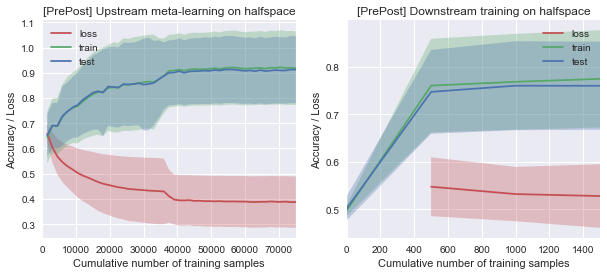

Mean essential stats across all runs:
Last upstream loss: 0.3872
Last upstream train accuracy: 0.9179
Last upstream test accuracy: 0.9126
Last downstream loss: 0.5278
Last downstream train accuracy: 0.7746
Last downstream test accuracy: 0.7600

Saving figure to: figs/comparing_transfer_prepostcount_halfspace


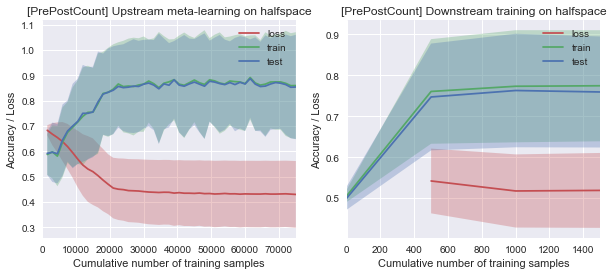

Mean essential stats across all runs:
Last upstream loss: 0.4292
Last upstream train accuracy: 0.8592
Last upstream test accuracy: 0.8536
Last downstream loss: 0.5185
Last downstream train accuracy: 0.7744
Last downstream test accuracy: 0.7592

Saving figure to: figs/comparing_transfer_prepostpercent_halfspace


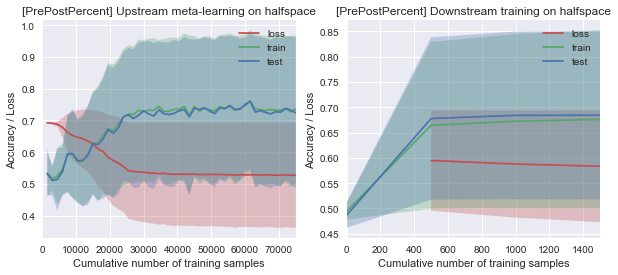

Mean essential stats across all runs:
Last upstream loss: 0.5282
Last upstream train accuracy: 0.7353
Last upstream test accuracy: 0.7240
Last downstream loss: 0.5834
Last downstream train accuracy: 0.6761
Last downstream test accuracy: 0.6844

Saving figure to: figs/comparing_transfer_postcount_halfspace


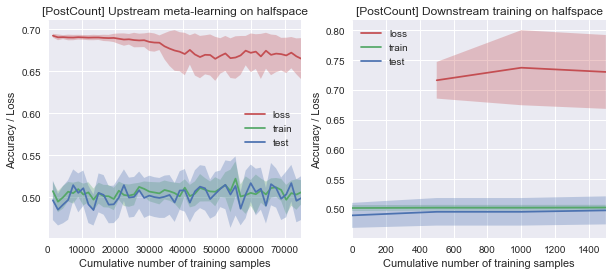

Mean essential stats across all runs:
Last upstream loss: 0.6648
Last upstream train accuracy: 0.5063
Last upstream test accuracy: 0.4994
Last downstream loss: 0.7301
Last downstream train accuracy: 0.5022
Last downstream test accuracy: 0.4974



In [8]:
# Plot aggregated stats.
agg_stats_prepost_up = convert_multi_stats_uncertainty(stats_prepost_up)
agg_stats_prepost_down = convert_multi_stats_uncertainty(stats_prepost_down)
plot_curves(agg_stats_prepost_up, agg_stats_prepost_down,
            '[PrePost] Upstream meta-learning on ' + dataset,
            '[PrePost] Downstream training on ' + dataset,
            'figs/comparing_transfer_prepost_' + dataset)
agg_stats_prepostcount_up = convert_multi_stats_uncertainty(stats_prepostcount_up)
agg_stats_prepostcount_down = convert_multi_stats_uncertainty(stats_prepostcount_down)
plot_curves(agg_stats_prepostcount_up, agg_stats_prepostcount_down,
            '[PrePostCount] Upstream meta-learning on ' + dataset,
            '[PrePostCount] Downstream training on ' + dataset,
            'figs/comparing_transfer_prepostcount_' + dataset)
agg_stats_prepostpercent_up = convert_multi_stats_uncertainty(stats_prepostpercent_up)
agg_stats_prepostpercent_down = convert_multi_stats_uncertainty(stats_prepostpercent_down)
plot_curves(agg_stats_prepostpercent_up, agg_stats_prepostpercent_down,
            '[PrePostPercent] Upstream meta-learning on ' + dataset,
            '[PrePostPercent] Downstream training on ' + dataset,
            'figs/comparing_transfer_prepostpercent_' + dataset)
agg_stats_postcount_up = convert_multi_stats_uncertainty(stats_postcount_up)
agg_stats_postcount_down = convert_multi_stats_uncertainty(stats_postcount_down)
plot_curves(agg_stats_postcount_up, agg_stats_postcount_down,
            '[PostCount] Upstream meta-learning on ' + dataset,
            '[PostCount] Downstream training on ' + dataset,
            'figs/comparing_transfer_postcount_' + dataset)

Saving figure to: figs/comparing_transfer_table_halfspace


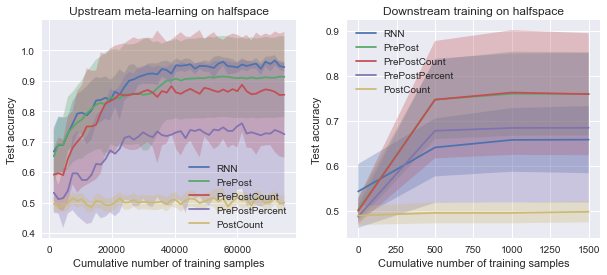

In [9]:
# Plot to compare all.
all_stats_up = [agg_stats_rnn_up, agg_stats_prepost_up, agg_stats_prepostcount_up, agg_stats_prepostpercent_up, agg_stats_postcount_up]
all_stats_down = [agg_stats_rnn_down, agg_stats_prepost_down, agg_stats_prepostcount_down, agg_stats_prepostpercent_down, agg_stats_postcount_down]
labels = ['RNN', 'PrePost', 'PrePostCount', 'PrePostPercent', 'PostCount']
plot_compare_models(all_stats_up, all_stats_down, labels,
                    'Upstream meta-learning on ' + dataset,
                    'Downstream training on ' + dataset,
                    'figs/comparing_transfer_table_' + dataset)

In [10]:
if 0:
    agg_stats_prepost_up = convert_multi_stats_uncertainty(stats_prepost_up)
    agg_stats_prepost_down = convert_multi_stats_uncertainty(stats_prepost_down)
    for i in range(len(stats_prepost_up)):
        plot_curves(stats_prepost_up[i], stats_prepost_down[i],
                    '[PrePost] Upstream meta-learning on ' + dataset,
                    '[PrePost] Downstream training on ' + dataset)

## Similarly, evaluate RNN and table-based networks but retain the SAME instance upstream and downstream; only the dataset is reinstantiated.

In [14]:
# IMPORTANT: Henceforth, we use GD directly on inputs but use plasticity rules in the output and hidden layers.
opts = Options(gd_input=True,
               use_graph_rule=True,
               gd_graph_rule=True,
               use_output_rule=True,
               gd_output_rule=True,
               gd_output=False)
scheme = UpdateScheme(cross_entropy_loss=True,
                      mse_loss=False,
                      update_misclassified_only=False,
                      update_all_edges=True)

# Feed-forward brain config.
# See start of notebook.
n = 8

# Training config.
# See start of notebook.

In [15]:
# Instantiate brain factories.
brain_rnn_fact = lambda: LocalNet(n_up, m, 64, p, 32, 3, options=opts, update_scheme=scheme)
brain_prepos_fact = lambda: FFLocalNet(
    n, m, l, w, p, cap, hl_rules=TableRule_PrePost(),
    output_rule=TableRule_PrePost(), options=opts, update_scheme=scheme)
brain_prepostcount_fact = lambda: FFLocalNet(
    n, m, l, w, p, cap, hl_rules=TableRule_PrePostCount(),
    output_rule=TableRule_PrePostCount(), options=opts, update_scheme=scheme)
brain_prepostpercent_fact = lambda: FFLocalNet(
    n, m, l, w, p, cap, hl_rules=TableRule_PrePostPercent(),
    output_rule=TableRule_PrePostPercent(), options=opts, update_scheme=scheme)
brain_postcount_fact = lambda: FFLocalNet(
    n, m, l, w, p, cap, hl_rules=TableRule_PostCount(),
    output_rule=TableRule_PostCount(), options=opts, update_scheme=scheme)

In [16]:
# Evaluate models.
print('==== Original RNN (very different from all the rest) ====')
stats_rnn_up, stats_rnn_down = evaluate_brain(
    brain_rnn_fact, n, dataset=dataset,
    num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)
print('==== Interpretation: Pre and Post ====')
stats_prepost_up, stats_prepost_down = evaluate_brain(
    brain_prepost_fact, n, dataset=dataset,
    num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)
print('==== Interpretation: Pre and Post and Incoming Count ====')
stats_prepostcount_up, stats_prepostcount_down = evaluate_brain(
    brain_prepostcount_fact, n, dataset=dataset,
    num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)
print('==== Interpretation: Pre and Post and Binned Incoming Fraction ====')
stats_prepostpercent_up, stats_prepostpercent_down = evaluate_brain(
    brain_prepostpercent_fact, n, dataset=dataset,
    num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)
print('==== Interpretation: Post and Incoming Count ====')
stats_postcount_up, stats_postcount_down = evaluate_brain(
    brain_postcount_fact, n, dataset=dataset,
    num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)

  0%|                                  | 0/50 [00:00<?, ?it/s]

==== Original RNN (very different from all the rest) ====

Run 1 / 10...
Meta-learning...


 98%|████████████████████████▌| 49/50 [01:34<00:01,  1.92s/it]


KeyboardInterrupt: 

In [ ]:
# Plot aggregated stats.
agg_stats_rnn_up = convert_multi_stats_uncertainty(stats_rnn_up)
agg_stats_rnn_down = convert_multi_stats_uncertainty(stats_rnn_down)
plot_curves(agg_stats_rnn_up, agg_stats_rnn_down,
            '[RNN] Upstream meta-learning on ' + dataset,
            '[RNN] Downstream training on ' + dataset,
            'figs/comparing_single_rnn_' + dataset)
agg_stats_prepost_up = convert_multi_stats_uncertainty(stats_prepost_up)
agg_stats_prepost_down = convert_multi_stats_uncertainty(stats_prepost_down)
plot_curves(agg_stats_prepost_up, agg_stats_prepost_down,
            '[PrePost] Upstream meta-learning on ' + dataset,
            '[PrePost] Downstream training on ' + dataset,
            'figs/comparing_single_prepost_' + dataset)
agg_stats_prepostcount_up = convert_multi_stats_uncertainty(stats_prepostcount_up)
agg_stats_prepostcount_down = convert_multi_stats_uncertainty(stats_prepostcount_down)
plot_curves(agg_stats_prepostcount_up, agg_stats_prepostcount_down,
            '[PrePostCount] Upstream meta-learning on ' + dataset,
            '[PrePostCount] Downstream training on ' + dataset,
            'figs/comparing_single_prepostcount_' + dataset)
agg_stats_prepostpercent_up = convert_multi_stats_uncertainty(stats_prepostpercent_up)
agg_stats_prepostpercent_down = convert_multi_stats_uncertainty(stats_prepostpercent_down)
plot_curves(agg_stats_prepostpercent_up, agg_stats_prepostpercent_down,
            '[PrePostPercent] Upstream meta-learning on ' + dataset,
            '[PrePostPercent] Downstream training on ' + dataset,
            'figs/comparing_single_prepostpercent_' + dataset)
agg_stats_postcount_up = convert_multi_stats_uncertainty(stats_postcount_up)
agg_stats_postcount_down = convert_multi_stats_uncertainty(stats_postcount_down)
plot_curves(agg_stats_postcount_up, agg_stats_postcount_down,
            '[PostCount] Upstream meta-learning on ' + dataset,
            '[PostCount] Downstream training on ' + dataset,
            'figs/comparing_single_postcount_' + dataset)

In [ ]:
# Plot to compare all.
all_stats_up = [agg_stats_rnn_up, agg_stats_prepost_up, agg_stats_prepostcount_up, agg_stats_prepostpercent_up, agg_stats_postcount_up]
all_stats_down = [agg_stats_rnn_down, agg_stats_prepost_down, agg_stats_prepostcount_down, agg_stats_prepostpercent_down, agg_stats_postcount_down]
labels = ['RNN', 'PrePost', 'PrePostCount', 'PrePostPercent', 'PostCount']
plot_compare_models(all_stats_up, all_stats_down, labels,
                    'Upstream meta-learning on ' + dataset,
                    'Downstream training on ' + dataset,
                    'figs/comparing_single_table_' + dataset)

## Evaluate all small-ANN-based feed-forward networks.